# 3.14 Forward Propagation, Back Propagation and Computational Graphs

- In the previous secitons...
  - we calculated the forward propagation of the model
    - we calculated the model output for the input
  - Then, execute the auto-generated `backward` function to calculate the gradient
    - based on back-propagation
- In this section...
  - we will use both mathematical and computational graphs to describe ***forward and back propagation***

## 3.14.1 Forward Propagation
- Forward Propagation
  - It refers to ***the calculation and storage of intermediate variables*** (including outputs) for the neural network in the order from input layer to output layer.
  - Let’s assume that the input example is $\mathbf{x}\in \mathbb{R}^d$ and there is no bias term. 
  - Here the intermediate variable is 

  $$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x}$$
  where $\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ is the weight parameter of the hidden layer.
  - After entering the intermediate variable $\mathbf{z}\in \mathbb{R}^h$ into the activation function $\phi$ operated by the basic elements 

$$\mathbf{h}= \phi (\mathbf{z}).$$
  - The hidden variable $\mathbf{h}$ is also an intermediate variable. 
  - Assuming the parameters of the output layer only possess a weight of $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$, we can obtain an output layer variable with a vector length of $q$, 
  
  $$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$<br/>
  
  - Assuming the loss function is $l$ and the example label is $y$, we can then calculate the loss term for a single data example, 
  
  $$L = l(\mathbf{o}, y).$$<br/>
  - According to the definition of $\ell_2$ norm regularization, given the hyper-parameter $\lambda$, the regularization term is 
  
  $$s = \frac{\lambda}{2} \left(|\mathbf{W}^{(1)}|_F^2 + |\mathbf{W}^{(2)}|_F^2\right),$$<br/>
  where the Frobenius norm of the matrix is equivalent to the calculation of the $L_2$ norm after flattening the matrix to a vector. 
    - https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm
  - The model's regularized loss on a given data example 
  
  $$J = L + s.$$
  - We refer to $J$ as the ***objective function*** of a given data exampl

## 3.14.2 Computational Graph of Forward Propagation
- Plotting computational graphs helps us visualize the dependencies of operators and variables within the calculation.
![](https://github.com/d2l-ai/d2l-en/raw/master/img/forward.svg?sanitize=true![image.png](attachment:image.png)

## 3.14.3 Back Propagation
- Back propagation refers to the method of ***calculating the gradient of neural network parameters*** in the order of the output layer to the input layer according to the ‘chain rule ’in calculus.
- Chain rule
  - Assume that we have functions $\mathsf{Y}=f(\mathsf{X})$ and $\mathsf{Z}=g(\mathsf{Y}) = g \circ f(\mathsf{X})$, in which the input and the output $\mathsf{X}, \mathsf{Y}, \mathsf{Z}$ are tensors of arbitrary shapes.
  - By using the chain rule we can compute the derivative of $\mathsf{Z}$ wrt. $\mathsf{X}$ via

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

- The parameters of the simple network with one hidden layer are $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$ ==> The objective of back propagation is to calculate the gradients $\partial J/\partial \mathbf{W}^{(1)}$ and $\partial J/\partial \mathbf{W}^{(2)}$.
- The first step is to calculate the gradients of the objective function $J=L+s$ with respect to the loss term $L$ and the regularization term $s$.

$$\frac{\partial J}{\partial L} = 1 \text{ and } \frac{\partial J}{\partial s} = 1$$
- Next we compute the gradient of the objective function with respect to variable of the output layer $\mathbf{o}$ according to the chain rule.

$$ \frac{\partial J}{\partial \mathbf{o}} = \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right) = \frac{\partial L}{\partial \mathbf{o}} \in \mathbb{R}^q $$<br/>

- Next we calculate the gradients of the regularization term with respect to both parameters.

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}, \frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)} \text{ and } \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}} = \mathbf{h}^\top $$<br/>

- Now we are able calculate the gradient $\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$ of the model parameters closest to the output layer. Using the chain rule yields:

$$ \frac{\partial J}{\partial \mathbf{W}^{(2)}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right) = \frac{\partial L}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)} $$<br/>

- and so forth.

## 3.14.4 Training a Model
- When training networks, forward and backward propagation depend on each other. 
  - For forward propagation we traverse the compute graph in the direction of dependencies and compute all the variables on its path. 
  - For backpropagation, the variables are used to compute gradients on the graph in reverse order. 
- Why backpropagation requires significantly more memory?
  - 1) We need to retain the intermediate values until backpropagation is complete. 
  - 2) we typically train with minibatches containing more than one variable

## 3.15 Numerical Stability and Initialization

## 3.15.1 Vanishing and Exploding Gradients
- Consider a deep network with $d$ layers, input $\mathbf{x}$ and output $\mathbf{o}$. Each layer satisfies:

$$\mathbf{h}^{t+1} = f_t (\mathbf{h}^t) \text{ and thus } \mathbf{o} = f_d \circ \ldots \circ f_1(\mathbf{x})$$
- The gradient of $\mathbf{o}$ with respect to any set of parameters $\mathbf{W}_t$ associated with the function $f_t$ at layer $t$ simply as

$$\partial_{\mathbf{W}t} \mathbf{o} = \underbrace{\partial_{\mathbf{h}^{d-1}} \mathbf{h}^d}_{:= \mathbf{M}_d} \cdot \ldots \cdot \underbrace{\partial_{\mathbf{h}^{t+1}} \mathbf{h}^{t+2}}_{:= \mathbf{M}_{t+1}} \cdot \underbrace{\partial_{\mathbf{h}^{t}} \mathbf{h}^{t+1}}_{:= \mathbf{M}_t} \cdot \underbrace{\partial_{\mathbf{W}t} \mathbf{h}^t}_{:= \mathbf{v}_t}.$$

- The matrices $M_t$ may well have a wide variety of eigenvalues. 
  - They might be small, they might be large, and in particular, their product might well be very large or very small.
  - http://setosa.io/ev/eigenvectors-and-eigenvalues/
- This means that the optimization algorithm is bound to fail. 
  - It either receives gradients with excessively large or excessively small steps. 
  - In the former case, the parameters explode
  - In the latter case, we end up with vanishing gradients and no meanigful progress.

- Exploding Gradients
  - we draw 100 Gaussain random matrices and multiply them with some initial matrix.

In [15]:
%matplotlib inline
import mxnet as mx
from mxnet import nd, autograd
from matplotlib import pyplot as plt
from numpy import linalg as LA

M = nd.random.normal(shape=(4,4))
print('A single matrix', M)
print()

w, v = LA.eig(M.asnumpy())
print(w)

for i in range(100):
    M = nd.dot(M, nd.random.normal(shape=(4,4)))

print('After multiplying 100 matrices', M)

A single matrix 
[[-5.5410951e-01 -2.5639790e-01 -7.8186011e-01 -1.5031214e+00]
 [-1.0607985e+00 -2.5132334e+00  6.5148938e-01 -6.0702908e-01]
 [ 5.2347612e-01 -2.0822671e-03  6.1475140e-01  1.4645545e+00]
 [ 5.7122988e-01  1.1327640e+00 -5.2853018e-01 -2.0936570e-01]]
<NDArray 4x4 @cpu(0)>

[-1.705154  +0.j         -0.38180867+0.74472266j -0.38180867-0.74472266j
 -0.19318593+0.j        ]
After multiplying 100 matrices 
[[ 4.1391511e+23  3.2834950e+22 -7.0896819e+21 -1.4974215e+22]
 [ 1.6037556e+24  1.2722228e+23 -2.7469440e+22 -5.8018901e+22]
 [-1.9988672e+23 -1.5856566e+22  3.4237518e+21  7.2313263e+21]
 [-3.6506759e+23 -2.8959967e+22  6.2529075e+21  1.3206971e+22]]
<NDArray 4x4 @cpu(0)>


- Vanishing Gradients
  - Picking 'sigmoid' as nonlinear activation function might be problematic.
  - If the activations are not in the range of $[-4, 4]$, the gradients of the overall product may vanish. 
  - Before ReLu $\max(0,x)$ was proposed, this problem used to be the bane of deep network training. 
  - As a consequence ReLu has become the default choice when designing activation functions in deep networks.

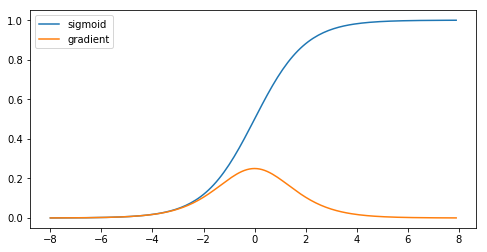

In [13]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.sigmoid()
y.backward()

plt.figure(figsize=(8, 4))
plt.plot(x.asnumpy(), y.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

- Symmetry
  - Assume that we initialize the parameters of a layer as $\mathbf{W}_l = 0$ or all entries of $\mathbf{W}_l$ are identical. 
    - In this case the gradients for all units in the layer are identical.
    - We will never be able to use the expressive power inherent in the layer. 
      - In fact, the hidden layer behaves as if it had only a single unit.

## 3.15.2 Parameter Initialization
- We can ensure that at least initially the gradients do not vanish and that they are within a reasonable scale where the network weights do not diverge. 
- Basic initialization
  - `net.initialize()`
    - It use the default random initialization method
      - Each element of the weight parameter is randomly sampled with an uniform distribution $U[-0.07, 0.07]$ 
      - Bias parameters are all set to $0$. 
      
  - `net.initialize(init.Normal(sigma=0.01))` 
    - Pick normally distributed random numbers as initial values for the weights and bias.
  - Both choices tend to work quite well in practice for moderate problem sizes.

- Xavier Initialization
  - http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
  - Assume that hidden units of a layer  $$h_{i} = \sum_{j=1}^{n_\mathrm{in}} W_{ij} x_j$$
  - The weights $W_{ij}$ are all drawn independently from the same distribution. 
  - Let's assume that this distribution has zero mean and variance $\sigma^2$ 
  - Let's assume that the inputs also have zero mean and variance $\gamma^2$ and that they're independent of $\mathbf{W}$. 
  - In this case we can compute mean and variance of $h_i$ as follows: $$ \begin{aligned} \mathbf{E}[h_i] & = \sum_{j=1}^{n_\mathrm{in}} \mathbf{E}[W_{ij} x_j] = 0 \\ \mathbf{E}[h_i^2] & = \sum_{j=1}^{n_\mathrm{in}} \mathbf{E}[W^2_{ij} x^2_j] \\ & = \sum_{j=1}^{n_\mathrm{in}} \mathbf{E}[W^2_{ij}] \mathbf{E}[x^2_j] \\ & = n_\mathrm{in} \sigma^2 \gamma^2 \end{aligned} $$

  - One way to keep the variance fixed is to set $n_\mathrm{in} \sigma^2 = 1$. 
  - When backpropagation is executed, instead of $\mathbf{W} \mathbf{w}$, we need to deal with $\mathbf{W}^\top \mathbf{g}$, where $\mathbf{g}$ is the incoming gradient from the layer above. 
  - Using the same reasoning, one way to keep the gradients' variance fixed is to set $n_\mathrm{out} \sigma^2 = 1$. 
  - So, we simply try to satisfy $$ \begin{aligned} \frac{1}{2} (n_\mathrm{in} + n_\mathrm{out}) \sigma^2 = 1 \text{ or equivalently } \sigma = \sqrt{\frac{2}{n_\mathrm{in} + n_\mathrm{out}}} \end{aligned} $$
  - For Gaussian random variables...
    - the Xavier initialization picks a normal distribution with zero mean and variance $\sigma^2 = 2/(n_\mathrm{in} + n_\mathrm{out})$. 
  - For uniformly distributed random variables $U[-a, a]$... 
    - What do we choose $a$ value?
    - Variance $\sigma^2$ is given by $a^2/3$. 
    - Plugging $a^2/3$ into $\sigma^2$ yields that $a=\sqrt{6/(n_\mathrm{in} + n_\mathrm{out})}$
    
- Beyond
  - The `mxnet.initializer` package
    - https://mxnet.incubator.apache.org/api/python/optimization/optimization.html#the-mxnet-initializer-package

# 3.16 Environment
- Two important things
  - 1) where the data came from 
  - 2) how the built models get deployed

## 3.16.1 Covariate Shift

- ***Covariate Shift***
  - the situation where the distribution over the covariates (aka training data) is shifted on test data relative to the training case
  - Mathematically speaking, we are referring the case where $p(x)$ changes but $p(y|x)$ remains unchanged